# Importing required libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data

In [2]:

exp_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/eu_health_expending.csv", compression='gzip')
life_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/life-expectancy.csv", compression='gzip')
mort_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/mortality_rate.csv", compression='gzip')


# Cleaning the Data

In [3]:

exp_df.head()
exp_df.columns, exp_df.shape
exp_df['Classification of health care financing schemes - SHA 2011'].value_counts()

# remove unnecessary columns
exp_clean = exp_df[['geo',
        'Geopolitical entity (reporting)', 'TIME_PERIOD', 'unit', 'icha11_hf','Classification of health care financing schemes - SHA 2011', 'OBS_VALUE']]


# renaming the columns
exp_clean.rename(columns={
    'geo': 'Country Code',
    'Geopolitical entity (reporting)': 'Country Name', 
    'TIME_PERIOD': 'Year', 
    'unit': 'Unit', 
    'icha11_hf': 'Financing Code',
    'Classification of health care financing schemes - SHA 2011': 'Category', 
    'OBS_VALUE': 'Spending'
}, inplace=True)

exp_clean['Unit'].value_counts()
# exp_clean.head()
exp_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_health_spending.csv')

C:\Users\39351\AppData\Local\Temp\ipykernel_7560\3514256760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_clean.rename(columns={


In [4]:
life_df.head()
life_df.columns, life_df.shape

#remove unnecessary information
life_clean = life_df[['geo', 'Geopolitical entity (reporting)', 'Unit of measure', 
                      'sex', 'age', 'Age class', 
                      'TIME_PERIOD', 'OBS_VALUE']]

# rename columns
life_clean.rename(columns={
    'geo': 'Country Code', 
    'Geopolitical entity (reporting)': 'Country Name', 
    'Unit of measure': 'unit',
    'sex': 'Gender', 
    'age': 'Age', 
    'Age class': 'Age Class',
    'TIME_PERIOD': 'Year', 
    'OBS_VALUE': 'Life Expectancy'  
}, inplace=True)

life_clean.head()
# life_clean['Age'].value_counts()
life_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_life_expectancy.csv')


C:\Users\39351\AppData\Local\Temp\ipykernel_7560\3121727190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_clean.rename(columns={


In [5]:
mort_df.head()
mort_df.columns, mort_df.shape

# remove unnecessary columns
mort_clean = mort_df[['geo', 'Geopolitical entity (reporting)','Type of mortality', 
                      'sex', 'icd10','Unit of measure','TIME_PERIOD', 'OBS_VALUE']]

mort_clean.rename(columns={
    'geo': 'Country Code', 
    'Geopolitical entity (reporting)': 'Country Name',
    'Type of mortality': 'Type of Mortality', 
    'sex': 'Gender', 
    'icd10': 'Diseas',
    'Unit of measure': 'Unit',
    'TIME_PERIOD': 'Year', 
    'OBS_VALUE': 'Mortality Rate'
}, inplace=True)

mort_clean.head()
mort_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_mortality_rate.csv')

C:\Users\39351\AppData\Local\Temp\ipykernel_7560\3192663005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_clean.rename(columns={


# Merging data

In [ ]:
## Find common countries and year in the datasets
common_countries = set(exp_clean['Country Code']).intersection(life_clean['Country Code'], mort_clean['Country Code'])
common_years = set(exp_clean['Year']).intersection(life_clean['Year'], mort_clean['Year'])

# Filter the data
exp_filtered = exp_clean[exp_clean['Country Code'].isin(common_countries) & exp_clean['Year'].isin(common_years)]
life_filtered = life_clean[life_clean['Country Code'].isin(common_countries) & life_clean['Year'].isin(common_years)]
mort_filtered = mort_clean[mort_clean['Country Code'].isin(common_countries) & mort_clean['Year'].isin(common_years)]


# Merge the datasets on Country code and year
merged_data = exp_filtered.merge(
    life_filtered, on=['Country Code', 'Year'], how='inner'
    ).merge(
        mort_filtered, on=['Country Code', 'Year', 'Gender'],
        how='inner'
    )

# merged_data['Age Class'].value_counts()
merged_data.drop(columns=['Country Name_y', 'Country Name', 'Age', 'unit', 'Unit_y'], inplace=True)
merged_data.rename(columns={
    'Country Name_x' : 'Country Name',
    'Unit_x' : 'Spending Unit',
}, inplace= True)

# merged_data.head()

Country Code Country Name  Year Spending Unit Financing Code  \
0           AT      Austria  2012       EUR_HAB          HF121   
1           AT      Austria  2012       EUR_HAB          HF121   
2           AT      Austria  2012       EUR_HAB          HF121   
3           AT      Austria  2012       EUR_HAB          HF121   
4           AT      Austria  2012       EUR_HAB          HF121   

                          Category  Spending Gender Age Class  \
0  Social health insurance schemes   1678.79      F    1 year   
1  Social health insurance schemes   1678.79      F    1 year   
2  Social health insurance schemes   1678.79      F    1 year   
3  Social health insurance schemes   1678.79      F   2 years   
4  Social health insurance schemes   1678.79      F   2 years   

   Life Expectancy      Type of Mortality Diseas  Mortality Rate  
0             82.8  Preventable mortality  TOTAL           96.16  
1             82.8                  Total  TOTAL          165.88  
2             82.8    Treatable mortality  TOTAL           69.72  
3             81.9  Preventable mortality  TOTAL           96.16  
4             81.9                  Total  TOTAL          165.88

In [23]:
# saved the merged data into CSV file
merged_data.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/merged_eu_health_data.csv')

# Spending vs Life Expectancy

<function matplotlib.pyplot.show(close=None, block=None)>

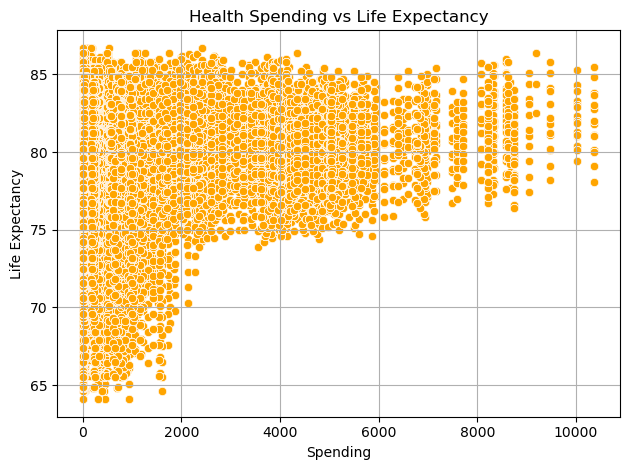

In [24]:
sns.scatterplot(data=merged_data, x='Spending', y='Life Expectancy', color='Orange')
plt.title('Health Spending vs Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show

# Spending vs Mortality Rate

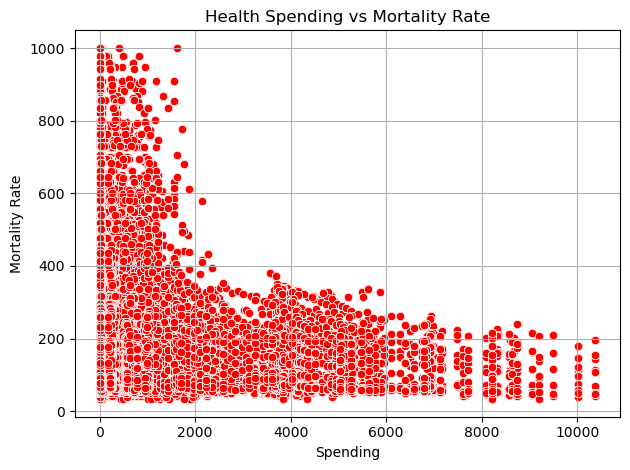

In [25]:
sns.scatterplot(data=merged_data, x='Spending', y='Mortality Rate', color='Red')
plt.title('Health Spending vs Mortality Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
merged_data.corr(numeric_only=True)

Year  Spending  Life Expectancy  Mortality Rate
Year             1.000000  0.030117        -0.005839        0.015520
Spending         0.030117  1.000000         0.148216       -0.121432
Life Expectancy -0.005839  0.148216         1.000000       -0.718741
Mortality Rate   0.015520 -0.121432        -0.718741        1.000000

# Healthcare Spending Trends over Time for (some Countries)

In [27]:
Selected_countries = ['Netherlands', 'Sweden', 'Belgium','Norway', 'France', 'Italy']

filtered_data = merged_data[merged_data['Country Name'].isin(Selected_countries)]

# filtered_data.head()

colours = {
  'Netherlands': 'Orange', 
  'Sweden': 'yellow', 
  'Belgium': 'black',
  'Norway': 'Red', 
  'France': 'Blue', 
  'Italy': 'green'  
}

fig = px.scatter(
    filtered_data,
    x = 'Year',
    y = 'Spending',
    color= 'Country Name',
    color_discrete_map= colours,
    trendline='ols',  # Ordinary Least Squares trendline
    facet_col='Country Name',
    facet_col_wrap=3, 
    # markers= True,
    title= 'Health Spending Trends over Time (by Country)',
    opacity = 0.6,
    labels= {'Year':'Year', 'Spending': 'Spending per Capita'}

)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=500, width=800)
# fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))


fig.show()


In [29]:
fig2 = px.scatter(
    filtered_data,
    x = 'Year',
    y = 'Life Expectancy',
    color='Country Name',
    color_discrete_map= colours, 
    facet_col= 'Country Name',
    trendline= 'ols',
    facet_col_wrap= 3,
    title= 'Life Expectancy Trends over Time(by Country)',
    labels= {'Year':'Year', 'Life Expectancy': 'Life Expectancy (Years)'},
    opacity= 0.6

)

fig2.update_layout(height= 500, width=800)
fig2.update_traces(marker=dict(size=6))

fig2.show()

In [30]:
fig3 = px.scatter(
    filtered_data,
    x = 'Year',
    y = 'Mortality Rate',
    color='Country Name',
    color_discrete_map= colours,
    facet_col= 'Country Name',
    facet_col_wrap=3,
    trendline= 'ols',
    title= 'Mortality rate Trends by Country (per 1000 people)',
    labels= {'Year':'Year', 'Mortality Rate': 'Mortality Rate'}

)

fig3.update_layout(height=500, width=800)
fig3.update_traces(marker=dict(size=6))


fig3.show()